# Initializing files into the notebook
* Install packages, import into notebook
* Mount Google Drive (need to add additional filepath variable for local)
* Import 8 csv month files into notebook
  * This is from Aidan in the Slack channel
* Import 12 csv month files into notebook
  * This is directly from FTP server

In [1]:
%pip install numpy pandas matplotlib seaborn scipy scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import r2_score,mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

In [3]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    google_path = '/content/drive/My Drive/IDX Exchange/data/'
except:
    google_path = './'

Mounted at /content/drive


In [4]:
# these 8 months are from what Aidan posted in the Slack channel
df_01 = pd.read_csv(google_path + 'CRMLSSold202408.csv')
df_02 = pd.read_csv(google_path + 'CRMLSSold202409.csv')
df_03 = pd.read_csv(google_path + 'CRMLSSold202410.csv')
df_04 = pd.read_csv(google_path + 'CRMLSSold202411.csv')
df_05 = pd.read_csv(google_path + 'CRMLSSold202412.csv')
df_06 = pd.read_csv(google_path + 'CRMLSSold202501_filled.csv')   # Columns (4) have mixed types. Set dtype option on import or set low_memory=False
df_07 = pd.read_csv(google_path + 'CRMLSSold202502.csv')
df_08 = pd.read_csv(google_path + 'CRMLSSold202503.csv')
df_09 = pd.read_csv(google_path + 'CRMLSSold202504.csv')
df_10 = pd.read_csv(google_path + 'CRMLSSold202505.csv')
df_11 = pd.read_csv(google_path + 'CRMLSSold202506.csv')
df_12 = pd.read_csv(google_path + 'CRMLSSold202507.csv')
df_13 = pd.read_csv(google_path + 'CRMLSSold202508.csv')
df_14 = pd.read_csv(google_path + 'CRMLSSold202509.csv')

/tmp/ipython-input-2923502233.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_11 = pd.read_csv(google_path + 'CRMLSSold202506.csv')


In [5]:
df_01.head()

,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,LotSizeDimensions,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict
0,PismoCoast,PismoCoast,NaN,NaN,NaN,NaN,NaN,1.5,542243082,bill@richardsonproperties.com,...,NaN,84942.0,NaN,NaN,NaN,NaN,93401,NaN,84942.0,NaN
1,SanDiego,SanDiego,NaN,False,NaN,NaN,NaN,1000000.0,537129950,melvinahomes@gmail.com,...,NaN,3219955.0,NaN,NaN,NaN,NaN,91935,0.0,3219955.0,NaN
2,RanchoSoutheast,RanchoSoutheast,NaN,NaN,NaN,NaN,NaN,990000.0,536732813,realtylydia@gmail.com,...,NaN,4688.0,NaN,NaN,NaN,NaN,90002,NaN,4688.0,NaN
3,RimOTheWorld,RimOTheWorld,NaN,True,NaN,NaN,NaN,13500.0,526278483,nikki.howard1958@gmail.com,...,NaN,5696.0,NaN,False,NaN,NaN,92352,0.0,5696.0,NaN
4,InlandValleys,InlandValleys,NaN,True,NaN,NaN,NaN,275000.0,523240472,WENDELLTU@AOL.COM,...,NaN,264409.0,NaN,False,NaN,NaN,92223,0.0,264409.0,NaN


In [6]:
# adding 12 months of data
# Train = from Sep 2024 to Aug 2025
# Test = Sep 2025

# Preprocessing the data
* Union the 8 months of data into one dataframe
* Filter on `PropertyType` and `PropertySubType`
* Cast some datatypes based on Metadata pdf (*only for features to use in model*)
* Fill some null values (*only for features to use in model*)


In [7]:
# need to union them all together
# check that all the columns in each dataframe is consistent with each other

if df_01.columns.equals(df_02.columns):
    print('1 and 2 Same columns')
else:
    print('Different columns')
if df_01.columns.equals(df_03.columns):
    print('1 and 3 Same columns')
else:
    print('Different columns')
if df_01.columns.equals(df_04.columns):
    print('1 and 4 Same columns')
else:
    print('Different columns')
if df_01.columns.equals(df_05.columns):
    print('1 and 5 Same columns')
else:
    print('Different columns')
if df_01.columns.equals(df_06.columns):
    print('1 and 6 Same columns')
else:
    print('Different columns')
if df_01.columns.equals(df_07.columns):
    print('1 and 7 Same columns')
else:
    print('Different columns')
if df_01.columns.equals(df_08.columns):
    print('1 and 8 Same columns')
else:
    print('Different columns')
if df_01.columns.equals(df_09.columns):
    print('1 and 9 Same columns')
else:
    print('Different columns')
if df_01.columns.equals(df_10.columns):
    print('1 and 10 Same columns')
else:
    print('Different columns')
if df_01.columns.equals(df_11.columns):
    print('1 and 11 Same columns')
else:
    print('Different columns')
if df_01.columns.equals(df_12.columns):
    print('1 and 12 Same columns')
else:
    print('Different columns')
if df_01.columns.equals(df_13.columns):
    print('1 and 13 Same columns')
else:
    print('Different columns')
if df_01.columns.equals(df_14.columns):
    print('1 and 14 Same columns')
else:
    print('Different columns')

1 and 2 Same columns
1 and 3 Same columns
1 and 4 Same columns
1 and 5 Same columns
Different columns
1 and 7 Same columns
1 and 8 Same columns
1 and 9 Same columns
1 and 10 Same columns
1 and 11 Same columns
1 and 12 Same columns
1 and 13 Same columns
1 and 14 Same columns


In [8]:
# union the dataframes together
df = pd.concat([df_01, df_02, df_03, df_04, df_05, df_06, df_07, df_08, df_09, df_10, df_11, df_12, df_13], ignore_index=True)
# df = Aug 2024 - Aug 2025
# df_14 = Sep 2025

In [9]:
# filter only on PropertyType and PropertySubType
df = df[df['PropertyType'] == 'Residential']
df = df[df['PropertySubType'] == 'SingleFamilyResidence']

# filters entries from 151,830 to 75,077

In [10]:
# features need to be cast to their correct datatypes as defined by metadata

df['ViewYN'] = df['ViewYN'].astype(bool)
df['PoolPrivateYN'] = df['PoolPrivateYN'].astype(bool)
df['AttachedGarageYN'] = df['AttachedGarageYN'].astype(bool)
df['YearBuilt'] = df['YearBuilt'].astype('Int64')
df['BathroomsTotalInteger'] = df['BathroomsTotalInteger'].astype('Int64')
df['BedroomsTotal'] = df['BedroomsTotal'].astype('Int64')
df['FireplaceYN'] = df['FireplaceYN'].astype(bool)
df['Stories'] = df['Stories'].astype('Int64')
# df['Levels'] = df['Levels'].astype('Int64')
df['MainLevelBedrooms'] = df['MainLevelBedrooms'].astype('Int64')
df['NewConstructionYN'] = df['NewConstructionYN'].astype(bool)


In [11]:
# fill in null values

df = df.infer_objects(copy=False)

df['ViewYN'] = df['ViewYN'].fillna(False)
df['PoolPrivateYN'] = df['PoolPrivateYN'].fillna(False)
df['Latitude'] = df['Latitude'].fillna(0)
df['Longitude'] = df['Longitude'].fillna(0)
df['LivingArea'] = df['LivingArea'].fillna(0)
df['AttachedGarageYN'] = df['AttachedGarageYN'].fillna(False)
df['ParkingTotal'] = df['ParkingTotal'].fillna(0.0)
df['LotSizeAcres'] = df['LotSizeAcres'].fillna(0.0)
df['YearBuilt'] = df['YearBuilt'].fillna(0)
df['StreetNumberNumeric'] = df['StreetNumberNumeric'].fillna(0)
df['BathroomsTotalInteger'] = df['BathroomsTotalInteger'].fillna(0)
df['City'] = df['City'].fillna('Unknown')
df['FireplaceYN'] = df['FireplaceYN'].fillna(False)
df['Stories'] = df['Stories'].fillna(0)
df['Levels'] = df['Levels'].fillna('None')
df['LotSizeArea'] = df['LotSizeArea'].fillna(0.0)
df['NewConstructionYN'] = df['NewConstructionYN'].fillna(True)
df['GarageSpaces'] = df['GarageSpaces'].fillna(0)
df['LotSizeSquareFeet'] = df['LotSizeSquareFeet'].fillna(0.0)

In [12]:
features_temp = ['ViewYN', 'PoolPrivateYN'
,'Latitude','Longitude','LivingArea','AttachedGarageYN'
,'ParkingTotal','LotSizeAcres','YearBuilt'
,'BathroomsTotalInteger'
#,'City'
,'FireplaceYN','Stories'
#, 'Levels'
, 'LotSizeArea', 'NewConstructionYN', 'GarageSpaces', 'LotSizeSquareFeet']

## dropping outliers

In [13]:
display(df['City'].value_counts(dropna=False))
# drop from 838 to 718

,count
City,
Los Angeles,5751
San Diego,4819
San Jose,2966
Riverside,2176
Oakland,1876
...,...
Newcastle,1
Johannesburg,1
Pine Cove,1


In [14]:
# Get the value counts for the 'City' column
city_counts = df['City'].value_counts()

# Identify cities that appear only once
cities_to_drop = city_counts[city_counts == 1].index

# Drop rows where the 'City' is in the list of cities to drop
df = df[~df['City'].isin(cities_to_drop)].copy()

print("Shape after dropping cities with single occurrences:", df.shape)

Shape after dropping cities with single occurrences: (143404, 80)


In [15]:
for feature in features_temp:
    print(f"Value counts for column: {feature}")
    display(df[feature].value_counts(dropna=False))
    print("\n" + "="*50 + "\n")

Value counts for column: ViewYN


,count
ViewYN,
True,91172
False,52232




Value counts for column: PoolPrivateYN


,count
PoolPrivateYN,
False,108149
True,35255




Value counts for column: Latitude


,count
Latitude,
33.694407,57
34.410839,32
0.000000,31
36.553696,29
36.778261,26
...,...
33.986418,1
33.697096,1
37.377068,1




Value counts for column: Longitude


,count
Longitude,
-116.969959,57
-117.350612,32
0.000000,31
-121.921711,29
-119.417932,26
...,...
-117.109974,1
-117.218022,1
-117.234707,1




Value counts for column: LivingArea


,count
LivingArea,
1200.0,431
1400.0,374
1600.0,326
1300.0,324
1500.0,308
...,...
5852.0,1
8385.0,1
7755.0,1




Value counts for column: AttachedGarageYN


,count
AttachedGarageYN,
True,122109
False,21295




Value counts for column: ParkingTotal


,count
ParkingTotal,
2.0,75773
3.0,18979
4.0,15358
1.0,9637
0.0,8044
...,...
231.0,1
119.0,1
447.0,1




Value counts for column: LotSizeAcres


,count
LotSizeAcres,
0.1700,2772
0.0000,2596
0.1377,2285
0.1400,2183
0.1148,1998
...,...
1.2096,1
0.5186,1
45.2800,1




Value counts for column: YearBuilt


,count
YearBuilt,
2024,3792
1955,3047
1989,2793
1954,2529
1956,2523
...,...
1867,1
1800,1
1862,1




Value counts for column: BathroomsTotalInteger


,count
BathroomsTotalInteger,
2,62116
3,47967
1,13495
4,11512
5,4987
6,1964
7,684
8,287
9,149




Value counts for column: FireplaceYN


,count
FireplaceYN,
True,104564
False,38840




Value counts for column: Stories


,count
Stories,
1,80884
2,44049
0,18471




Value counts for column: LotSizeArea


,count
LotSizeArea,
7405.0,2682
0.0,2519
6000.0,2179
6098.0,1757
5000.0,1755
...,...
559310.0,1
3908.0,1
1948.0,1




Value counts for column: NewConstructionYN


,count
NewConstructionYN,
False,128204
True,15200




Value counts for column: GarageSpaces


,count
GarageSpaces,
2.00,89854
3.00,21260
0.00,16853
1.00,11860
4.00,2316
5.00,361
6.00,320
2.50,182
8.00,104




Value counts for column: LotSizeSquareFeet


,count
LotSizeSquareFeet,
7405.0,2681
0.0,2530
6000.0,2178
6098.0,1755
5000.0,1754
...,...
24057.0,1
21221.0,1
11852.0,1


In [16]:
# dropping outliers

df = df[df['LivingArea'] < 10000].copy()
df = df[(df['ParkingTotal'] < 20) & (df['ParkingTotal'] >= 0)].copy()
df = df[df['LotSizeAcres'] < 50].copy()
df = df[df['YearBuilt'] > 1850].copy()
df = df[df['BathroomsTotalInteger'] < 13].copy()
df = df[df['LotSizeArea'] < 100000].copy()
df = df[df['GarageSpaces'] < 10].copy()
df = df[df['LotSizeSquareFeet'] < 100000].copy()

print("Shape before outlier drop: (75077, 80)")
print("Shape after outlier drop: ", df.shape)
print(75077 - df.shape[0], 'outliers removed')

Shape before outlier drop: (75077, 80)
Shape after outlier drop:  (138890, 80)
-63813 outliers removed


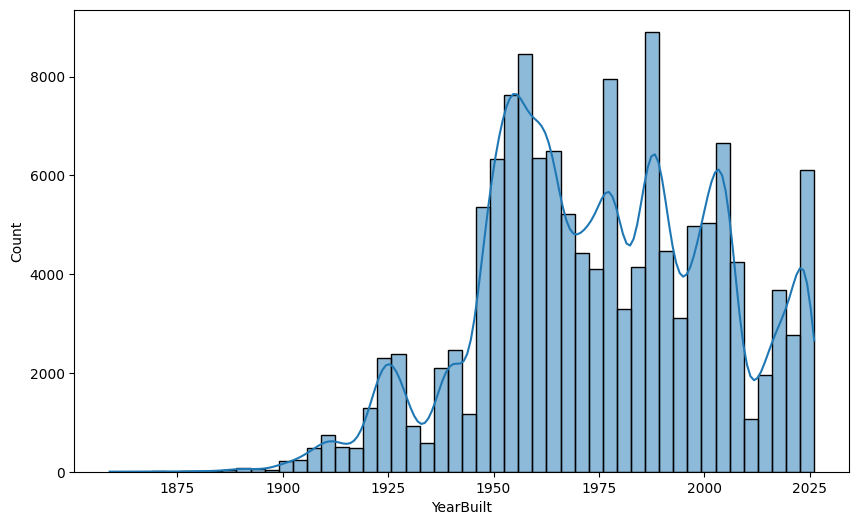

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['YearBuilt'], bins=50, kde=True)
plt.show()

In [18]:
# Check unique values in columns
display(df['Flooring'].unique())

array(['Tile,Wood', nan, 'Wood', 'Carpet,Laminate', 'Laminate',
       'Carpet,Tile,Vinyl', 'Carpet,Wood', 'Carpet,Stone,Tile,Wood',
       'Carpet', 'Carpet,Tile,Wood', 'Tile', 'Carpet,Stone,Wood',
       'Concrete,Laminate,Wood', 'Carpet,Concrete,Stone,Tile,Wood',
       'Vinyl', 'Stone,Wood', 'Carpet,Stone', 'Carpet,Tile',
       'Carpet,Laminate,Tile,Wood', 'Carpet,Vinyl',
       'Carpet,Laminate,Tile', 'Laminate,Tile', 'Laminate,Wood',
       'Vinyl,Wood', 'SeeRemarks,Wood', 'Laminate,Tile,Wood',
       'Tile,Vinyl', 'Carpet,SeeRemarks,Tile', 'Carpet,Concrete',
       'Carpet,Laminate,Vinyl,Wood', 'Concrete', 'Tile,Vinyl,Wood',
       'Carpet,Tile,Vinyl,Wood', 'Bamboo',
       'Carpet,Concrete,Laminate,Wood', 'Carpet,SeeRemarks',
       'Carpet,Laminate,Wood', 'Laminate,SeeRemarks,Tile,Vinyl',
       'Concrete,SeeRemarks', 'Carpet,Laminate,Vinyl',
       'Carpet,Stone,Tile', 'Carpet,Concrete,Tile,Vinyl',
       'Laminate,Stone,Wood', 'Laminate,SeeRemarks', 'Carpet,Vinyl,Wood',
   

In [19]:
# for each feature in the list, evaluate the distribution of values and see how to handle if there are too many missing values
# if there are too many missing values, maybe we can take them out or set some default value to them
# set a default value for sure for features that don't have too many missing values

# dropped mostly null columns, where non-null values < 5k
# 30 features left
features = ['Flooring'
, 'ViewYN', 'PoolPrivateYN', 'Latitude'
, 'Longitude', 'PropertyType', 'LivingArea'
, 'CountyOrParish', 'MlsStatus', 'ElementarySchool', 'AttachedGarageYN'
, 'ParkingTotal', 'PropertySubType', 'LotSizeAcres', 'YearBuilt', 'StreetNumberNumeric'
, 'BathroomsTotalInteger', 'City', 'BedroomsTotal'
, 'StateOrProvince', 'FireplaceYN'
, 'Stories', 'Levels', 'LotSizeArea', 'MainLevelBedrooms'
, 'NewConstructionYN', 'GarageSpaces', 'HighSchoolDistrict', 'PostalCode', 'LotSizeSquareFeet']



# drop features that aren't these? or create new dataframe with these features only

In [20]:
# After understanding the data, we need to figure out which features are unchanging for houses (sqft, zip code, # bed/bath, etc)
# NOT listing prices

# 41 features potentially unchanging
features = ['Flooring'
, 'ViewYN', 'WaterfrontYN', 'BasementYN', 'PoolPrivateYN', 'Latitude'
, 'Longitude', 'PropertyType', 'LivingArea', 'FireplacesTotal', 'AboveGradeFinishedArea'
, 'TaxAnnualAmount', 'CountyOrParish', 'MlsStatus', 'ElementarySchool', 'AttachedGarageYN'
, 'ParkingTotal', 'PropertySubType', 'LotSizeAcres', 'YearBuilt', 'StreetNumberNumeric'
, 'BathroomsTotalInteger', 'City', 'BuildingAreaTotal', 'BedroomsTotal', 'ElementarySchoolDistrict'
, 'BelowGradeFinishedArea', 'BusinessType', 'StateOrProvince', ',CoveredSpaces', 'FireplaceYN'
, 'Stories', 'Levels', 'LotSizeDimensions', 'LotSizeArea', 'MainLevelBedrooms'
, 'NewConstructionYN', 'GarageSpaces', 'HighSchoolDistrict', 'PostalCode', 'LotSizeSquareFeet']

In [21]:
# previewing untruncated data
pd.set_option('display.max_columns', None)
display(df.head())

,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,CloseDate,ClosePrice,ListAgentFirstName,ListAgentLastName,Latitude,Longitude,UnparsedAddress,PropertyType,LivingArea,ListPrice,DaysOnMarket,ListOfficeName,BuyerOfficeName,CoListOfficeName,ListAgentFullName,CoListAgentFirstName,CoListAgentLastName,BuyerAgentMlsId,BuyerAgentFirstName,BuyerAgentLastName,FireplacesTotal,AssociationFeeFrequency,AboveGradeFinishedArea,ListingKeyNumeric,MLSAreaMajor,TaxAnnualAmount,CountyOrParish,MlsStatus,ElementarySchool,AttachedGarageYN,ParkingTotal,BuilderName,PropertySubType,LotSizeAcres,SubdivisionName,BuyerOfficeAOR,YearBuilt,StreetNumberNumeric,ListingId,BathroomsTotalInteger,City,TaxYear,BuildingAreaTotal,BedroomsTotal,ContractStatusChangeDate,ElementarySchoolDistrict,CoBuyerAgentFirstName,PurchaseContractDate,ListingContractDate,BelowGradeFinishedArea,BusinessType,StateOrProvince,CoveredSpaces,MiddleOrJuniorSchool,FireplaceYN,Stories,HighSchool,Levels,LotSizeDimensions,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled
23,SouthBay,SouthBay,"Tile,Wood",False,NaN,True,False,1363500.0,1082146781,agentabbyw@gmail.com,2024-08-30,1363500.0,Abigail,Waddell,33.924152,-118.422457,617 Loma Vista Street,Residential,920.0,1363500.0,0,Compass,Compass,NaN,Abigail Waddell,NaN,NaN,SWADDABI,Abigail,Waddell,NaN,NaN,NaN,1082146781,141 - El Segundo,NaN,Los Angeles,Closed,NaN,True,0.0,NaN,SingleFamilyResidence,0.0706,NaN,SouthBay,1919,617.0,SB24179868,2,El Segundo,NaN,NaN,2,2024-08-30,NaN,NaN,2024-08-08,2024-08-06,NaN,NaN,CA,NaN,NaN,False,1,NaN,One,NaN,3074.0,2,False,0.0,El Segundo Unified,90245,0.0,3074.0,NaN,NaN,NaN
24,VenturaCoastal,VenturaCoastal,NaN,False,NaN,NaN,False,650000.0,1082143699,guzman.rach@gmail.com,2024-08-31,650000.0,Raquel,Guzman,34.159717,-119.151003,2120 Langley Street,Residential,1381.0,650000.0,0,Weichert Realtors - Superior Homes,Weichert Realtors - Superior Homes,NaN,Raquel Guzman,NaN,NaN,v211508512,Raquel,Guzman,NaN,NaN,NaN,1082143699,VC34 - Oxnard - Southeast,NaN,Ventura,Closed,NaN,False,2.0,NaN,SingleFamilyResidence,0.1400,NaN,VenturaCoastal,1968,2120.0,V1-25511,2,Oxnard,NaN,NaN,3,2024-08-31,NaN,NaN,2024-08-31,2024-06-26,NaN,NaN,CA,NaN,NaN,True,1,NaN,One,NaN,6100.0,<NA>,True,2.0,NaN,93033,NaN,6100.0,NaN,NaN,NaN
25,OrangeCounty,OrangeCounty,NaN,True,NaN,NaN,False,1000000.0,1082143415,Jamie@TheL3.com,2024-08-31,1000000.0,Jamie,Pirritano,33.697311,-117.994725,7662 Taylor Drive,Residential,1198.0,1000000.0,0,The L3,The L3,The L3,Jamie Pirritano,Jarrod,Stern,OCPIRRJAM,Jamie,Pirritano,NaN,NaN,NaN,1082143415,15 - West Huntington Beach,NaN,Orange,Closed,NaN,True,2.0,NaN,SingleFamilyResidence,0.1423,",unk",OrangeCounty,1960,7662.0,OC24180300,2,Huntington Beach,NaN,NaN,3,2024-08-31,NaN,Jarrod,2024-08-31,2024-08-30,NaN,NaN,CA,NaN,NaN,True,1,NaN,One,NaN,6200.0,3,False,2.0,Huntington Beach Union High,92648,0.0,6200.0,NaN,NaN,NaN
26,OrangeCounty,OrangeCounty,NaN,False,NaN,NaN,False,2955000.0,1082127218,irene@ireneandricky.com,2024-08-30,29550000.0,Irene,Zhang,33.671772,-117.680413,20 Barberry,Residential,3728.0,2955000.0,0,Keller Williams Realty Irvine,Keller Williams Realty Irvine,NaN,Irene Zhang,NaN,NaN,OCWANGTIN,Ting,Wang,NaN,Monthly,NaN,1082127218,BK - Baker Ranch,NaN,Orange,Closed,NaN,True,2.0,NaN,SingleFamilyResidence,0.1292,HIGHLANDS (BKHGL),OrangeCounty,2017,20.0,OC24174178,6,Lake Forest,NaN,NaN,5,2024-08-30,NaN,NaN,2024-08-30,2024-08-30,NaN,NaN,CA,NaN,NaN,False,2,NaN,Two,NaN,5626.0,1,False,2.0,Saddleback Valley Unified,92630,222.0,5626.0,NaN,NaN,NaN
27,PasadenaFoothills,PasadenaFoothills,NaN,True,NaN,NaN,False,1295000.0,1082126439,deanne.anderson@compass.com,2024-08-30,1400000.0,Deanne,Anderson,34.187226,-118.224442,2784 Mira Vista Drive,Residential,1905.0,1295000.0,0,COMPASS,COMPASS,NaN,Deanne Anderson,NaN,NaN,p21048,Karin,Carson,NaN,NaN,NaN,10

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138890 entries, 23 to 284410
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   BuyerAgentAOR                 138875 non-null  object 
 1   ListAgentAOR                  138875 non-null  object 
 2   Flooring                      89872 non-null   object 
 3   ViewYN                        138890 non-null  bool   
 4   WaterfrontYN                  54 non-null      object 
 5   BasementYN                    3397 non-null    object 
 6   PoolPrivateYN                 138890 non-null  bool   
 7   OriginalListPrice             138640 non-null  float64
 8   ListingKey                    138890 non-null  int64  
 9   ListAgentEmail                138468 non-null  object 
 10  CloseDate                     138890 non-null  object 
 11  ClosePrice                    138890 non-null  float64
 12  ListAgentFirstName            137794 non-null  o

# Data Exploration
* `.info()` and `.head()` to preview data
* Define features list to use for ML model
  * Code block to preview unique values in each feature

# Model selection and training
Want to predict ClosePrice

* Define `X` and `y` for `train_test_split`
* Random Forest Classifier
* R2, MAPE, median MAPE

In [23]:
# temporary list of features for just having some model
features_temp

# ClosePrice,	LivingArea,	Bedrooms,	Bathrooms, LotSize

['ViewYN',
 'PoolPrivateYN',
 'Latitude',
 'Longitude',
 'LivingArea',
 'AttachedGarageYN',
 'ParkingTotal',
 'LotSizeAcres',
 'YearBuilt',
 'BathroomsTotalInteger',
 'FireplaceYN',
 'Stories',
 'LotSizeArea',
 'NewConstructionYN',
 'GarageSpaces',
 'LotSizeSquareFeet']

In [24]:
# Select features and target
X = df[features_temp]
y = df['ClosePrice']

# X = pd.get_dummies(X, columns=['City', 'Levels'], dummy_na=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (111112, 16)
X_test shape: (27778, 16)


In [25]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Initialize and train the Random Forest Regressor model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Initialize and train the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [28]:
y_pred_linear = linear_model.predict(X_test)

linear_mape = mean_absolute_percentage_error(y_test, y_pred_linear)
linear_mdape = np.median(np.abs((y_test - y_pred_linear) / y_test))

y_pred_rf = forest_model.predict(X_test)
y_train_pred = forest_model.predict(X_train)

y_pred_gbr = gbr_model.predict(X_test)
y_train_pred_gbr = gbr_model.predict(X_train)

print('Linear Regression R^2:', linear_model.score(X_test, y_test))
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred_linear))
print('Linear Regression MAPE:', linear_mape)
print('Linear Regression Median Absolute Percentage Error:', linear_mdape)


print('Random Forest R^2:', forest_model.score(X_test,y_test))
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_rf))

print('Gradient Boosting MSE:', mean_squared_error(y_test, y_pred_gbr))
print('Gradient Boosting R^2:', gbr_model.score(X_test, y_test))

Linear Regression R^2: 0.04163041798462286
Linear Regression MSE: 15014696518366.162
Linear Regression MAPE: 3.490581076810297e+17
Linear Regression Median Absolute Percentage Error: 0.3227855983800766
Random Forest R^2: -0.7467032596438798
Random Forest MSE: 27365454667334.156
Gradient Boosting MSE: 15170343216073.838
Gradient Boosting R^2: 0.031695681012635646


In [29]:
# Calculate R2 score
r2 = r2_score(y_test, y_pred_rf)
print(f'Random Forest R^2 on test set: {r2}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_gbr)
print(f'Random Forest MAPE on test set: {mape}')

# Calculate Median Absolute Percentage Error (MdAPE)
mdape = np.median(np.abs((y_test - y_pred_gbr) / y_test))

print(f'Random Forest Median Absolute Percentage Error on test set: {mdape}')



Random Forest R^2 on test set: -0.7467032596438798
Random Forest MAPE on test set: 2.4398293792419264e+17
Random Forest Median Absolute Percentage Error on test set: 0.18616255992142428
